# 웹에서 주문수를 분석하는 테크닉

* 목적: 컴퓨터 판매 쇼핑몰 사이트의 주문수 추세를 분석한 판매량 개선

### csv 파일 불러오기
* cm = customer_master
* im = item_master
* t_1 = transaction_1
* td_1 = transaction_detail_1


In [1]:
import pandas as pd
cm = pd.read_csv('/Users/icda/pythondata/pyda100-master/1장/customer_master.csv')
cm.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [2]:
im = pd.read_csv('/Users/icda/pythondata/pyda100-master/1장/item_master.csv')
im.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [3]:
t_1 = pd.read_csv('/Users/icda/pythondata/pyda100-master/1장/transaction_1.csv')
t_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [4]:
td_1 = pd.read_csv('/Users/icda/pythondata/pyda100-master/1장/transaction_detail_1.csv')
td_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


### 데이터결합(유니언=행방향으로 결합=세로로 결합)
* transaction_1과 transaction_2, transaction_detail_1과 transaction_detail_2 결합

In [5]:
t_2 = pd.read_csv('/Users/icda/pythondata/pyda100-master/1장/transaction_2.csv')
transaction = pd.concat([t_1, t_2], ignore_index=True)
transaction

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [6]:
#데이터프레임 행의 수, 열의 수 확인
print(t_1.shape)

(5000, 4)


In [7]:
print(t_2.shape)

(1786, 4)


In [8]:
#결합한 데이터 shape 확인
print(transaction.shape)

(6786, 4)


In [9]:
#데이터 개수를 확인해서 유니언 검증
print(len(t_1))
print(len(t_2))
print(len(transaction))

5000
1786
6786


In [10]:
td_2 = pd.read_csv('/Users/icda/pythondata/pyda100-master/1장/transaction_detail_2.csv')
transaction_detail = pd.concat([td_1,td_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [11]:
#데이터 개수를 확인해서 유니언 검증
print(len(td_1))
print(len(td_2))
print(len(transaction_detail))

5000
2144
7144


### 매출 데이터끼리 결합(조인)
* 기준이 되는 데이터 결정
* 조인할 칼럼 걸정
* 추가할 데이터
    * transaction의 'payment_date, customer_id'
    * price는 한 번 구매할 때의 합계 금액 => transaction_detail의 quantity와 item_master의 item_price로 계산됨(추가x)
    * ㄴtransaction_detail에 상세 정보가 많아 추가하면 중복 계산
* 공통 데이터 칼럼
    * transaction_id

In [12]:
join_data = pd.merge(transaction_detail, transaction[["transaction_id", "payment_date", "customer_id"]], 
                     on="transaction_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [13]:
#데이터 조인 중복 확인
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


### 마스터데이터 결합(조인)

* 부족한(추고하고 싶은) 데이터는 무엇인가
* 공통 칼럼은 무엇인가

In [14]:
join_data = pd.merge(join_data, cm, on="customer_id", how="left")
join_data = pd.merge(join_data, im, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


### 필요한 데이터 칼럼을 만들기

* 매출 계산: quantity*item_price

In [15]:
#quantity, item_price, price 열의 청음 5행 출력
join_data["price"] = join_data["quantity"] * join_data["item_price"]
join_data[["quantity", "item_price", "price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


### 데이터 검산

* 데이터 가공 전 transaction의 price 총합과 데이터 가공 후 계산한 price의 총합은 같다
* -> 간단하게 검산으로 알아보기

In [16]:
print(join_data["price"].sum())
print(transaction["price"].sum())

971135000
971135000


In [17]:
#true/false로 확인하기
join_data["price"].sum() == transaction["price"].sum()

True

### 각종 통계량 파악

* 결손치의 개수
* 전체를 파악할 수 있는 숫자감


In [18]:
#결손치 파악
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [19]:
#각종 통계량 출력
#count(개수), mean(평균값), std(표준편차), min(최솟값), 25% 75%(사분위수), 50%(중앙값), max(최댓값)
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [20]:
#데이터 기간 확인
print(join_data["payment_date"].min())
print(join_data["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


### 월별 데이터 집계

* 과거 수년 데이터는 여러가지 비즈니스 모델이 포함되어 있을 수 있기 때문에 전체 데이터를 한번에 분석하면 시계열 변화를 잘못 파악하는 경우가 있다
* 데이터 범위를 좁혀서 분석
* payment_date에서 연월 단위로 price를 집계해서 매출 동향 확인

In [21]:
#payment_date 데이터형 확인
join_data.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

In [22]:
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m")
join_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [23]:
join_data.groupby('payment_month').sum()['price']

TypeError: datetime64 type does not support sum operations

In [24]:
join_data[['payment_month']].head()

,payment_month
0,201902
1,201902
2,201902
3,201902
4,201902


In [25]:
join_data[['price']].head()

,price
0,210000
1,50000
2,120000
3,210000
4,170000


In [26]:
# 'payment_month' 열의 데이터 타입 확인
print(join_data['payment_month'].dtype)

# 'payment_month' 열의 데이터 타입을 int로 변경
join_data['payment_month'] = join_data['payment_month'].astype(int)


object


In [27]:
#payment_date 데이터형 확인
join_data.dtypes

detail_id                     int64
transaction_id               object
item_id                      object
quantity                      int64
payment_date         datetime64[ns]
customer_id                  object
customer_name                object
registration_date            object
email                        object
gender                       object
age                           int64
birth                        object
pref                         object
item_name                    object
item_price                    int64
price                         int64
payment_month                 int64
dtype: object

In [28]:
# 'payment_month' 열의 데이터 타입 확인
print(join_data['payment_month'].dtype)

# 'payment_month' 열의 처음 몇 개의 데이터 출력
print(join_data['payment_month'].head())

# 'payment_month' 열의 고유한 값 확인
print(join_data['payment_month'].unique())

# 데이터에 숫자 이외의 문자가 포함되어 있는지 확인
# 예를 들어, 빈 문자열이나 결측값이 포함되어 있을 수 있습니다.

# 필요한 경우 데이터 정리 및 int로 변환
# 예를 들어, 문자열을 int로 변환하는 방법은 다음과 같습니다:
# join_data['payment_month'] = join_data['payment_month'].astype(int)


int64
0    201902
1    201902
2    201902
3    201902
4    201902
Name: payment_month, dtype: int64
[201902 201903 201904 201905 201906 201907]


In [29]:
join_data['pm'] = join_data['payment_month'].copy()

In [30]:
join_data.dtypes

detail_id                     int64
transaction_id               object
item_id                      object
quantity                      int64
payment_date         datetime64[ns]
customer_id                  object
customer_name                object
registration_date            object
email                        object
gender                       object
age                           int64
birth                        object
pref                         object
item_name                    object
item_price                    int64
price                         int64
payment_month                 int64
pm                            int64
dtype: object

In [31]:
join_data.groupby('pm').sum()['price']

TypeError: datetime64 type does not support sum operations

In [32]:
join_data[['pm']]

,pm
0,201902
1,201902
2,201902
3,201902
4,201902
...,...
7139,201907
7140,201907
7141,201907
7142,201907


In [33]:
# 'payment_month' 열의 데이터 타입 확인
print(join_data['pm'].dtype)

# 'payment_month' 열의 데이터 타입을 int로 변경
join_data['pm'] = join_data['pm'].astype(object)

int64


In [34]:
# 'payment_month' 열의 데이터 타입 확인
print(join_data['pm'].dtype)

object


In [35]:
#구글링
#https://stackoverflow.com/questions/77062953/exclude-datetime-from-groupby-sum
join_data.groupby(['payment_month'])[['price']].sum()

,price
payment_month,
201902,160185000
201903,160370000
201904,160510000
201905,155420000
201906,164030000
201907,170620000


### 월별 상품별로 데이터 집계

In [36]:
#오류나는 코드(왜인지 모르것음)
#join_data.groupby(["payment_month","item_name"]).sum()[["price","quantity"]]

In [37]:
join_data.groupby(["payment_month","item_name"])[["price", "quantity"]].sum()

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [38]:
#pivot_table로 집계
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price','quantity'], aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

### 상품별 매출 추이 가시화

In [39]:
#pivot_table로 데이터 집계
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name',
                            values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


In [40]:
import matplotlib.pyplot as plt

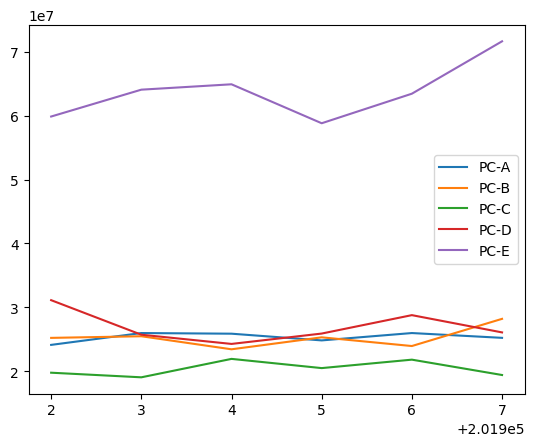

In [41]:
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()

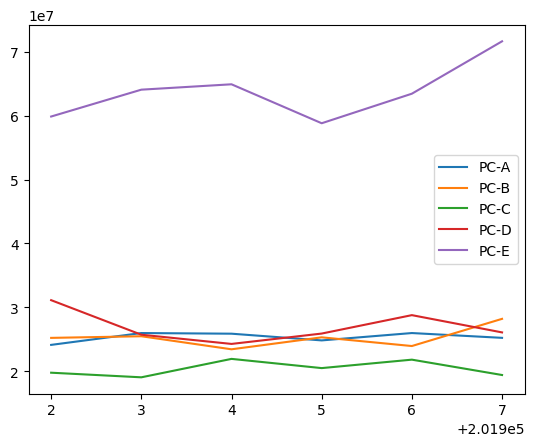

In [42]:
#%matplotlib inline 말고 plt.show()로 그리기
plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()
plt.show()